# 📦 1. Import Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 📊 2. Load and Explore the Data


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


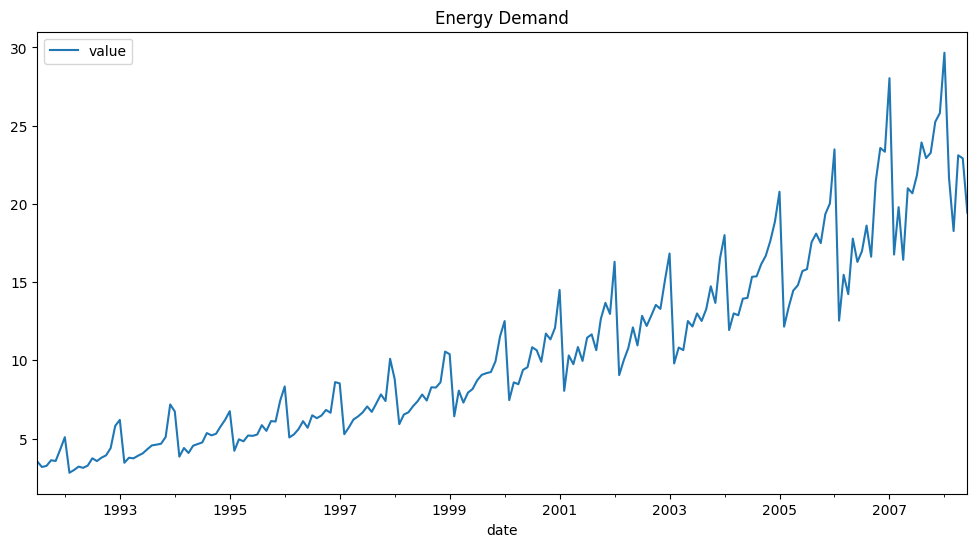

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot(figsize=(12,6), title='Energy Demand')
df.head()

# 🧼 3. Preprocessing


In [5]:
df['prev'] = df['value'].shift(1)
df.dropna(inplace=True)

# 🧪 4. Train/Test Split

In [6]:
X = df[['prev']]
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 🔍 5. Model Training


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 📈 6. Predictions + Plotting


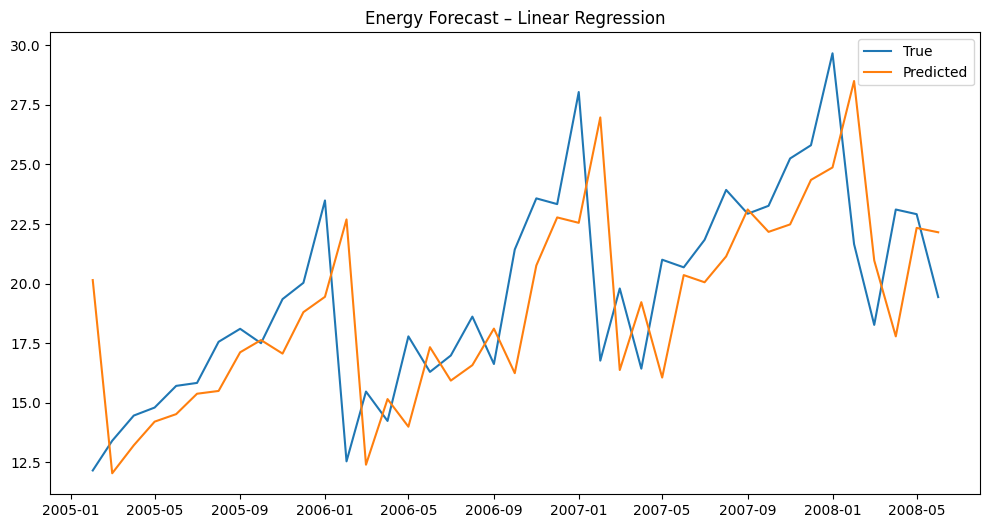

In [8]:
y_pred = model.predict(X_test)
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='True')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Energy Forecast – Linear Regression")
plt.legend()
plt.show()

# 📋 7. Model Evaluation

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14.213652631057792


### 🧠 Model Observations

- Model: Linear Regression using lagged values
- MSE: 14 → RMSE ≈ 3.74
- The model captures the trend, but struggles with sharp spikes or drops
- Good starting point — will try more advanced models (like XGBoost, Prophet, or LSTM) next

#Adding 'hour' and 'day_of_week' as new columns

In [24]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

#Adding a rolling average

In [32]:
df['rolling_mean_3'] = df['value'].rolling(window=3).mean().shift(1)

In [33]:
df.dropna(inplace=True)
X = df[['prev', 'prev_2', 'prev_3', 'day_of_week', 'rolling_mean_3']]

In [37]:
print(df.head())

               value      prev    prev_2    prev_3  rolling_mean_3  hour  \
date                                                                       
1992-10-01  3.924490  3.777202  3.558776  3.737851        3.691276     0   
1992-11-01  4.386531  3.924490  3.777202  3.558776        3.753489     0   
1992-12-01  5.810549  4.386531  3.924490  3.777202        4.029408     0   
1993-01-01  6.192068  5.810549  4.386531  3.924490        4.707190     0   
1993-02-01  3.450857  6.192068  5.810549  4.386531        5.463049     0   

            day_of_week  
date                     
1992-10-01            3  
1992-11-01            6  
1992-12-01            1  
1993-01-01            4  
1993-02-01            0  


#Defining features and target

In [38]:
X = df[['prev', 'prev_2', 'prev_3', 'day_of_week', 'rolling_mean_3']]
y = df['value']

#Splitting the data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

#Training the Model

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#Predict

In [41]:
y_pred = model.predict(X_test)

#Evaluate

In [42]:
mse = mean_squared_error(y_test, y_pred)
print("New Mean Squared Error:", mse)

New Mean Squared Error: 11.881463178705461


#Plotting

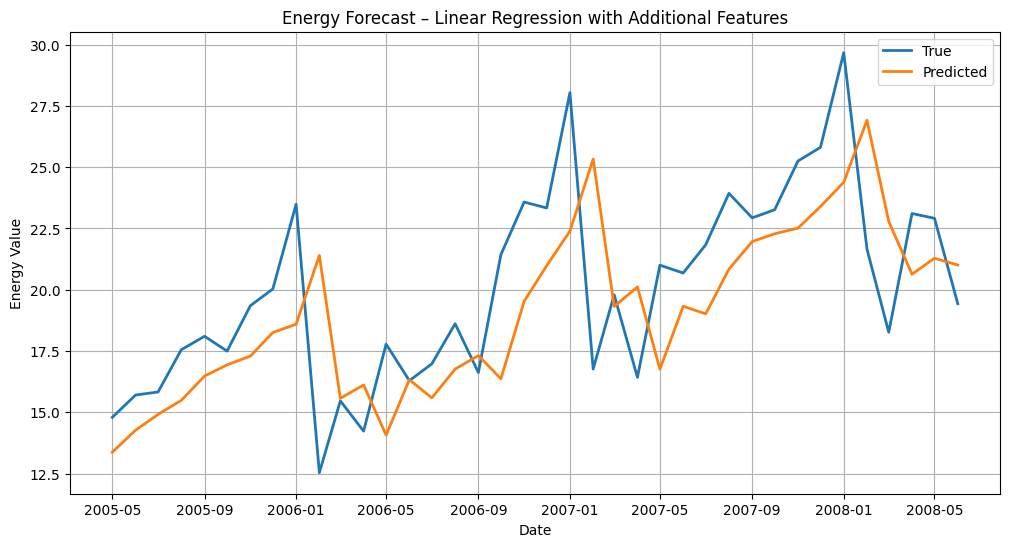

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='True', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linewidth=2)
plt.title("Energy Forecast – Linear Regression with Additional Features")
plt.xlabel("Date")
plt.ylabel("Energy Value")
plt.legend()
plt.grid(True)
plt.show()

🧠 Model Observations
- Model: Linear Regression using lagged values + time-based features (hour, day_of_week, rolling_3h)

- MSE: 14 → 11.88 → RMSE ≈ 3.45

- The model now better captures daily/weekly seasonality and short-term trends

- Still struggles with sharp spikes or anomalies, but overall prediction is smoother and more accurate

- Solid improvement through feature engineering — next step: explore more powerful models (XGBoost, Prophet, or LSTM)